In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("E:\\data_import\\Myproject\\transvision\\regression_dataset.xlsx")

In [3]:
data.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04 00:00:00,A,31.389999,31.300001,31.130000,31.630001,3815500.0
1,2010-01-05 00:00:00,A,31.209999,30.960001,30.760000,31.220001,4186000.0
2,2010-01-06 00:00:00,A,30.850001,30.850001,30.760000,31.000001,3243700.0
3,2010-01-07 00:00:00,A,30.780001,30.809999,30.500000,30.820001,3095100.0
4,2010-01-08 00:00:00,A,30.640000,30.800000,30.399999,30.850001,3733900.0


In [4]:
data.keys()

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [5]:
data.drop(['symbol', 'open', 'low', 'high', 'volume'],axis=1,inplace=True)  #Stock price in close time is enough for predicting the stock price

In [6]:
data.head()

,date,close
0,2010-01-04 00:00:00,31.300001
1,2010-01-05 00:00:00,30.960001
2,2010-01-06 00:00:00,30.850001
3,2010-01-07 00:00:00,30.809999
4,2010-01-08 00:00:00,30.800000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1764 non-null   object 
 1   close   1762 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.7+ KB


In [8]:
data.shape

(1765, 2)

In [9]:
data.isnull().sum()

date     1
close    3
dtype: int64

In [10]:
data=data.fillna(method='ffill')

In [11]:
data.isnull().sum()

date     0
close    0
dtype: int64

In [12]:
data.describe()

,close
count,1765.000000
mean,42.544578
std,7.569196
min,26.970000
25%,37.439999
50%,41.770000
75%,46.430000
max,60.930000


In [13]:
data.head()

,date,close
0,2010-01-04 00:00:00,31.300001
1,2010-01-05 00:00:00,30.960001
2,2010-01-06 00:00:00,30.850001
3,2010-01-07 00:00:00,30.809999
4,2010-01-08 00:00:00,30.800000


# Visualize the data

<AxesSubplot:>

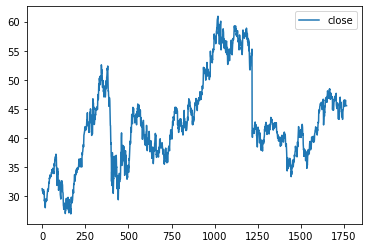

In [14]:
data.plot()

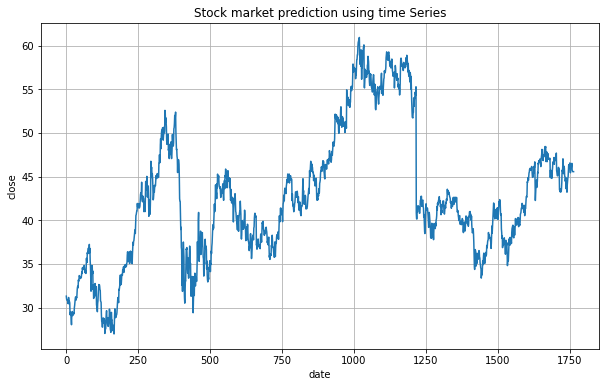

In [15]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('close')
plt.plot(data['close'])
plt.title('Stock market prediction using time Series')
plt.show()


<AxesSubplot:ylabel='Density'>

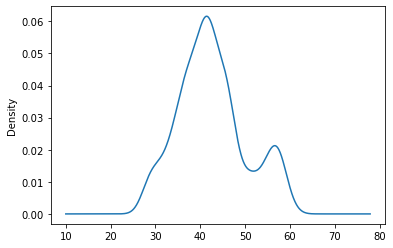

In [16]:
#Distribution of the dataset
data_close=data['close']
data_close.plot(kind="kde")   #it is a seasonal dataset..bcoz the variation is move upward and downward like that 

# Dicky-Fuller test

In [17]:
# Check whether the data is stationary or not..we use Argumented Dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(data['close'])

In [19]:
test_result  #it gives 4 different values

(-2.2372248265744368,
 0.19301336672626795,
 10,
 1754,
 {'1%': -3.434083692100666,
  '5%': -2.8631892171754747,
  '10%': -2.5676479940036065},
 4287.864921462674)

In [20]:
#null hypothesis refers to the data set is not stationary
#Alternate hypothesis refers to the data is stationary
def adfuller_test(stock):
    result=adfuller(stock)
    labels=['ADF test staistic','p-value','No.of Lags used',"No.of Observations used"]
    for value,label in zip(result,labels):
        print(label+ ':' +str(value))
    if(result[1]<=0.05):   #when the p-value is less
        print('strong evidence against null hypothesis, reject the null hypothesis.Data has no unit root and it is stationary')
    else:
        print('weak evidences against null hypothesis,time series has a unit root,indicating it is non-stationary')

In [21]:
adfuller_test(data['close'])   #the p-value is greater than than 0.05 so we accept the null hypothesis

ADF test staistic:-2.2372248265744368
p-value:0.19301336672626795
No.of Lags used:10
No.of Observations used:1754
weak evidences against null hypothesis,time series has a unit root,indicating it is non-stationary


In [22]:
    #the data is non stationary..so we have to do make it stationary

# Differencing

In [23]:
data['close first difference']=data['close']-data['close'].shift(1)  #the position of data changed in below position

In [24]:
data['seasonal first difference']=data['close']-data['close'].shift(12)   #12 months per year..it is a seasonal dataset..it will change in every month/week according to the market

In [25]:
data.head()

,date,close,close first difference,seasonal first difference
0,2010-01-04 00:00:00,31.300001,NaN,NaN
1,2010-01-05 00:00:00,30.960001,-0.340000,NaN
2,2010-01-06 00:00:00,30.850001,-0.110000,NaN
3,2010-01-07 00:00:00,30.809999,-0.040002,NaN
4,2010-01-08 00:00:00,30.800000,-0.009999,NaN


In [26]:
#again test dicky fuller test
adfuller_test(data['seasonal first difference'].dropna())

ADF test staistic:-6.08259595337521
p-value:1.0831974785422393e-07
No.of Lags used:25
No.of Observations used:1727
strong evidence against null hypothesis, reject the null hypothesis.Data has no unit root and it is stationary


In [27]:
#now I am getting p value is less than 0.05..so it indicates that it reject the null hypothesis and the dataset has stationary

<Figure size 1152x720 with 0 Axes>

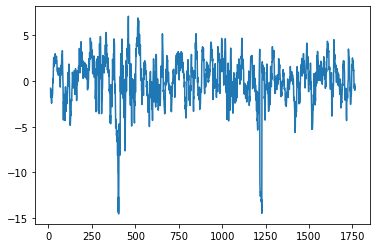

<Figure size 1152x720 with 0 Axes>

In [28]:
data['seasonal first difference'].plot()
plt.figure(figsize=(16,10))

# Auto Regressive Model

In [29]:
# # Identification of an AR model is often best done with the Partial Auto Correlation Function
# #     *For an AR model,the theoretical PACF 'shuts off' past the order of the model.'shuts off ' means that theory in partial autocorrelation
# #       are equal to 0 beyond that point.put another way the number of non-zero partial autocorrelation gives the order of the AR model.
    
# # Identification of MA model is often best than with Auto correlation Function instead of PACF.
# #      *For an MA model,the theoretical PACF does not shut off,but instead tapers toward o in some manner.A clearer pattern for an MA model is in the ACF.The ACF will have non-zero autocorrelation only at lags involved in the model.

# terms used in ARIMA:
#     p-AR model lags
#     d-differencing
#     q-Moving average order
# yt=c+pi1(yt-1)+pi2(yt-2)+...

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

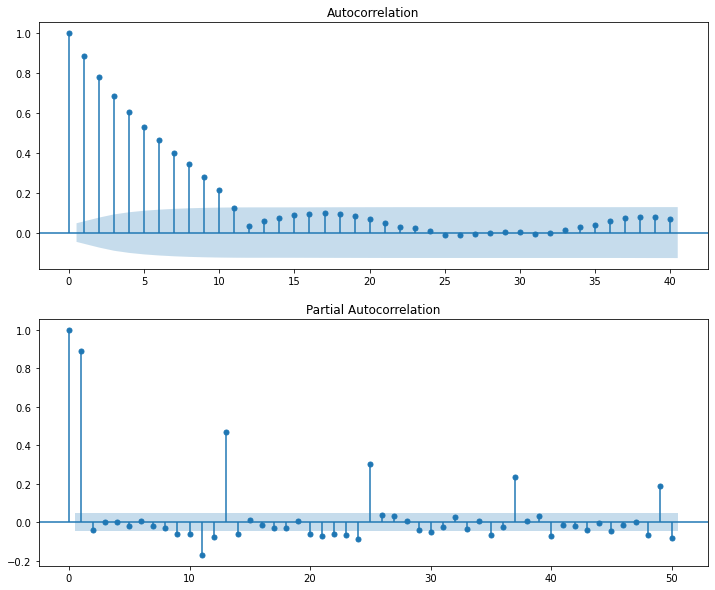

In [31]:
fig=plt.figure(figsize=(12,10))
axis1=fig.add_subplot(211)
fig=plot_acf(data['seasonal first difference'].dropna(),lags=40,ax=axis1)
axis2=fig.add_subplot(212)
fig=plot_pacf(data['seasonal first difference'].iloc[13:],lags=50,ax=axis2)

# Train Test Split

In [32]:
n=int(len(data)*0.8)
train=data.close[:n]  #80% of data refers to train and 20% of data refers to test
test=data.close[n:]
print(len(train))
print(len(test))

1412
353


In [33]:
# for non-seasonal data only we apply ARIMA..but this is seasonal dataset
#p=2,d=1(shift 1 time),q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [34]:
model=ARIMA(train,order=(2,1,1))
results=model.fit(disp=0)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1411
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1805.412
Method:                       css-mle   S.D. of innovations              0.870
Date:                Tue, 10 May 2022   AIC                           3620.825
Time:                        13:30:28   BIC                           3647.085
Sample:                             1   HQIC                          3630.638
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0057      0.019      0.301      0.764      -0.031       0.042
ar.L1.D.close     0.7137      0.104      6.891      0.000       0.511       0.917
ar.L2.D.close    -0.0486      0.028     -1.722      0.085      -0.104       0.007
ma.L1.D.close    -0.7284      0.101     -7.236      0.000      -0.926      -0.531
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5688           +0.0000j            1.5688            0.0000
AR.2           13.1159           +0.0000j           13.1159            0.0000
MA.1            1.3729           +0.0000j            1.3729            0.0000
-----------------------------------------------------------------------------
"""

(array([3.76979058e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.88489529e-03, 2.56345760e-02, 4.10153215e-01,
        9.27368484e-02, 1.13093718e-03]),
 array([-14.41643038, -12.53643942, -10.65644846,  -8.7764575 ,
         -6.89646654,  -5.01647558,  -3.13648462,  -1.25649366,
          0.6234973 ,   2.50348826,   4.38347922]),
 <BarContainer object of 10 artists>)

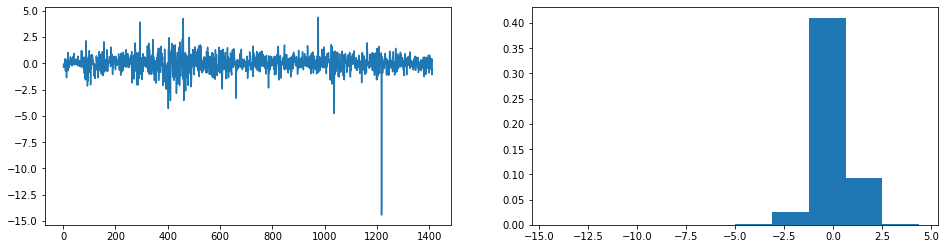

In [36]:
#plot residual errors-the error between a predicted value and the observed actual value..it shows how well regression model fits in a dataset.
residuals=pd.DataFrame(results.resid)
fig, (axis1,axis2)=plt.subplots(1,2, figsize=(16,4))
axis1.plot(residuals)
axis2.hist(residuals,density=True)

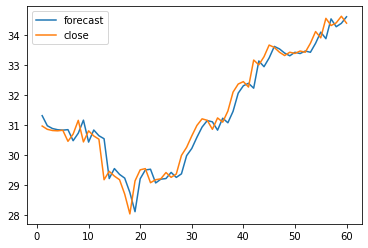

In [37]:
#Actual Vs Forecasting
results.plot_predict(
   start=1,end=60,dynamic=False);

In [39]:
fc, se, conf = results.forecast(353, alpha=0.05)  # 95% conf  #353-length of test
# forecast : ndarray
#     Array of out of sample forecasts
# stderr : ndarray
#     Array of the standard error of the forecasts.
# conf_int : ndarray
#     2d array of the confidence interval for the forecast


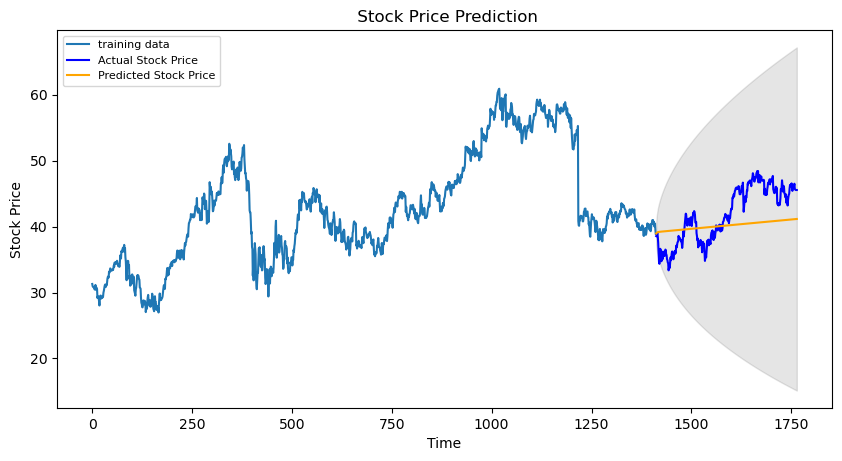

In [40]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot the stock price prediction
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [42]:
# report performance
mse = mean_squared_error(test,fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 16.277843955581435
MAE: 3.4899655584805327
RMSE: 4.034581013634679
MAPE: 0.08160219639739087


In [43]:
#With a MAPE of around 7.7%, the model is 92.3% accurate in predicting the next observations.

# Manual testing

In [44]:
data=pd.read_excel('E:\\data_import\\Myproject\\transvision\\time_series_dataset.xlsx')

In [45]:
data.head()

,date,volume
0,2010-01-04,9837300
1,2010-01-05,25212000
2,2010-01-06,16597900
3,2010-01-07,14033400
4,2010-01-08,12760000


In [46]:
data.isnull().sum()

date      0
volume    0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1762 non-null   datetime64[ns]
 1   volume  1762 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 27.7 KB


# Visualize the data

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('volume')
plt.plot(data['volume'])
plt.title('Stock market prediction using time Series')
plt.show()


In [ ]:
# Check whether the data is stationary or not..we use Argumented Dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [ ]:
#null hypothesis refers to the data set is not stationary
#Alternate hypothesis refers to the data is stationary
def adfuller_test(stock):
    result=adfuller(stock)
    labels=['ADF test staistic','p-value','No.of Lags used',"No.of Observations used"]
    for value,label in zip(result,labels):
        print(label+ ':' +str(value))
    if(result[1]<=0.05):   #when the p-value is less
        print('strong evidence against null hypothesis, reject the null hypothesis.Data has no unit root and it is stationary')
    else:
        print('weak evidences against null hypothesis,time series has a unit root,indicating it is non-stationary')

In [ ]:
adfuller_test(data['volume'])   #the p-value is less than 0.05 so we accept the null hypothesisnand it is stationary

# Auto Regressive Model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
fig=plt.figure(figsize=(12,10))
axis1=fig.add_subplot(211)
fig=plot_acf(data['volume'],lags=40,ax=axis1)
axis2=fig.add_subplot(212)
fig=plot_pacf(data['volume'],lags=50,ax=axis2)

# Train test split

In [ ]:
n=int(len(data)*0.8)
train=data.volume[:n]  #80% of data refers to train and 20% of data refers to test
test=data.volume[n:]
print(len(train))
print(len(test))

In [ ]:
# for non-seasonal data only we apply ARIMA..but this is seasonal dataset
#p=1,d=1(shift 1 time),q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(train,order=(1,1,1))
results=model.fit(disp=0)

In [ ]:
results.summary()

In [ ]:
#plot residual errors-the error between a predicted value and the observed actual value..it shows how well regression model fits in a dataset.
residuals=pd.DataFrame(results.resid)
fig, (axis1,axis2)=plt.subplots(1,2, figsize=(16,4))
axis1.plot(residuals)
axis2.hist(residuals,density=True)

In [ ]:
#Actual Vs Forecasting
results.plot_predict(
   start=1,end=60,dynamic=False);

In [ ]:
fc, se, conf = results.forecast(353, alpha=0.05)  # 95% conf  #353-length of test

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot the stock price prediction
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [ ]:
# report performance
mse = mean_squared_error(test,fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test)/np.abs(test))
print('MAPE: '+str(mape))